In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Getting to Know the data

In [110]:
df = pd.read_csv('sample_data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [101]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")


In [11]:
# Shows the Distribution of Heat Diseases with respect to male = 1 and female = 0
fig=px.histogram(df,
                 x="DEATH_EVENT",
                 color="sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Failure",
                 barmode="group")
fig.show()

In [14]:
fig=px.histogram(df,
                 x="sex",
                 color='sex',
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

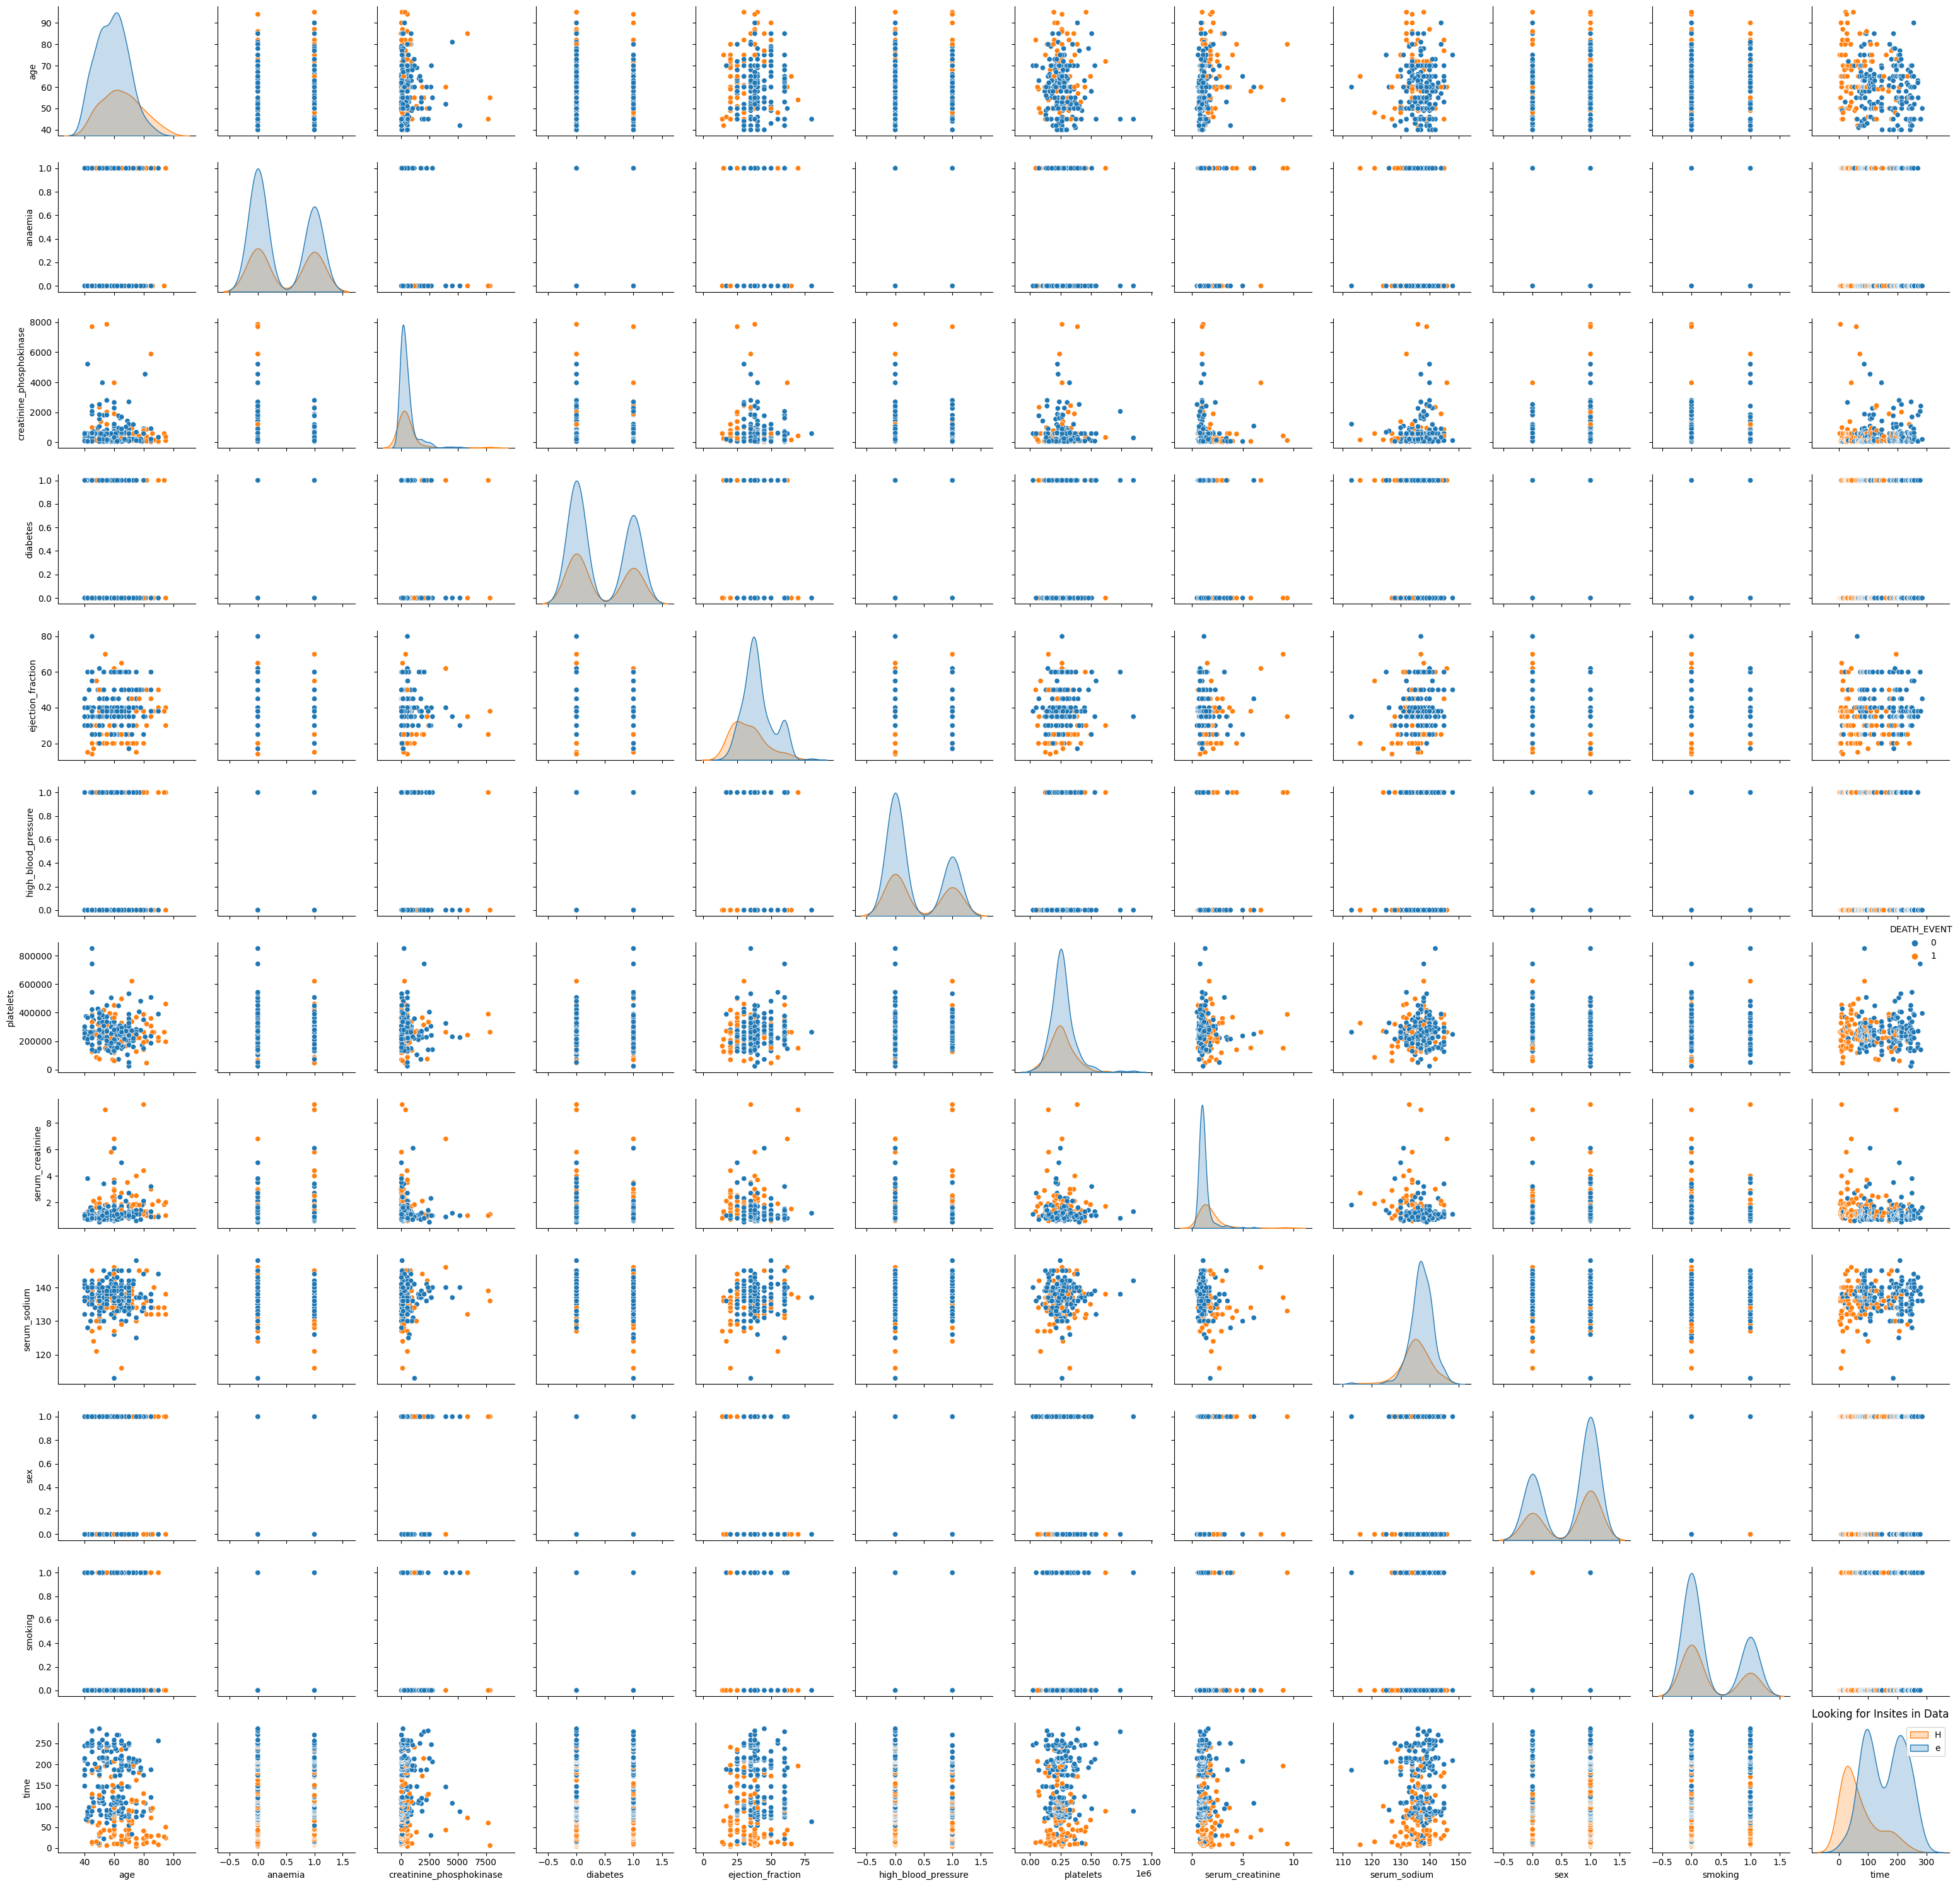

In [19]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="DEATH_EVENT")
plt.title("Looking for Insites in Data")
plt.legend("HeartFailure")
plt.tight_layout()
plt.plot()

In [28]:
fig = px.box(df,y="age",x="DEATH_EVENT",title=f"Distrubution of Age")
fig.show()

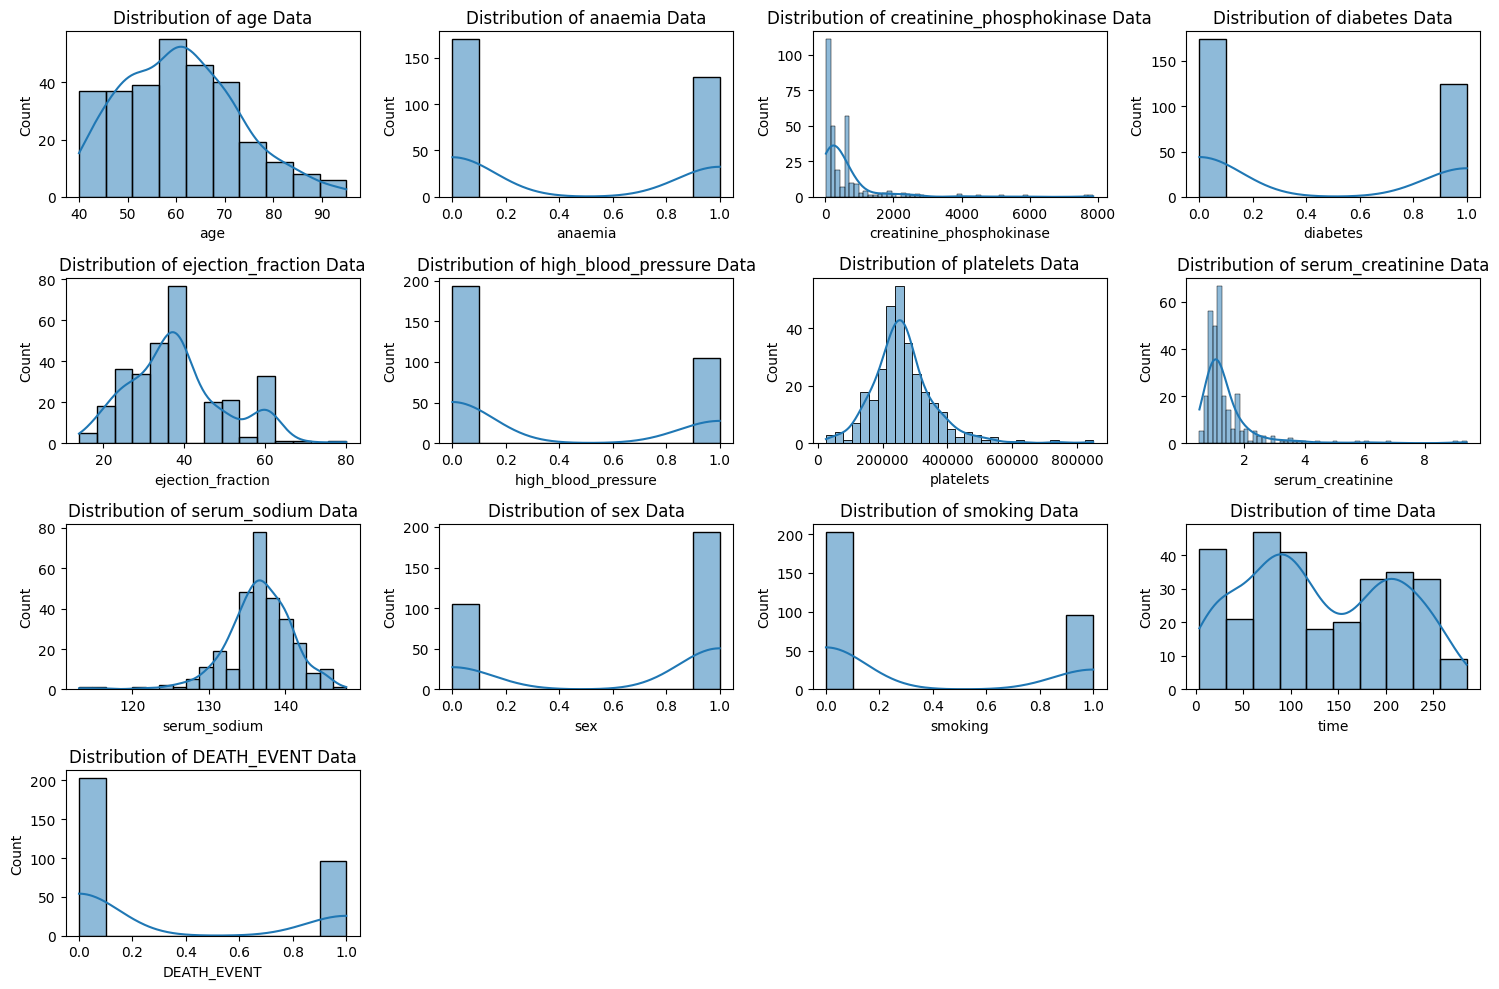

In [27]:
#check the linearity of the variables
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [32]:
fig = px.box(df,y="serum_creatinine",x="DEATH_EVENT",title=f"Distrubution of serum creatinine",color="sex")
fig.show()

Text(0.5, 1.0, 'Scatter Plot of time vs. DEATH_EVENT')

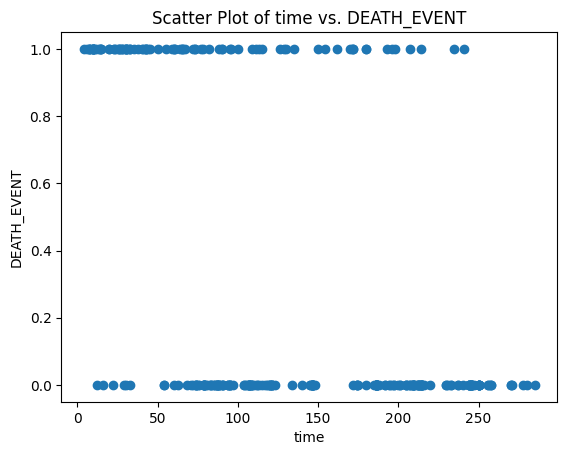

In [40]:
# Create a scatter plot
plt.scatter(df['time'], df['DEATH_EVENT'])

# Add labels and a title
plt.xlabel('time')
plt.ylabel('DEATH_EVENT')
plt.title('Scatter Plot of time vs. DEATH_EVENT')

# Preproccesing

In [42]:
# Handling Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [111]:
y = df['DEATH_EVENT'].values

In [118]:
feature_col = df.columns.to_list()
feature_col.remove("DEATH_EVENT")
feature_col.remove("time")

In [121]:
dfTrain = df
acc_log=[]

kf = StratifiedKFold(n_splits=2)
for fold , (trn_,val_) in enumerate(kf.split(X = dfTrain,y=y)):

    X_train=dfTrain.loc[trn_,feature_col]
    y_train=dfTrain.loc[trn_,"DEATH_EVENT"]

    X_valid=dfTrain.loc[val_,feature_col]
    y_valid=dfTrain.loc[val_,"DEATH_EVENT"]

    ro_scaler = StandardScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)


    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       102
           1       0.64      0.48      0.55        48

    accuracy                           0.75       150
   macro avg       0.71      0.68      0.69       150
weighted avg       0.74      0.75      0.74       150

The accuracy for Fold 1 : 0.6758578431372548
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       101
           1       0.64      0.44      0.52        48

    accuracy                           0.74       149
   macro avg       0.70      0.66      0.67       149
weighted avg       0.73      0.74      0.72       149

The accuracy for Fold 2 : 0.6593440594059407


In [105]:
# Normalize
scaler = StandardScaler()
standard_df = scaler.fit_transform(df)
standard_df = pd.DataFrame(standard_df,columns = df.columns)

X = standard_df.drop(['DEATH_EVENT','time'], axis=1)
y = df['DEATH_EVENT']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()

# Train
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)

Accuracy: 0.65
Confusion Matrix:
 [[32  3]
 [18  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75        35
           1       0.70      0.28      0.40        25

    accuracy                           0.65        60
   macro avg       0.67      0.60      0.58        60
weighted avg       0.67      0.65      0.61        60



In [102]:
# Using Decission tree Classifie
target = "DEATH_EVENT"
feature_col_tree=df.columns.to_list()
feature_col_tree.remove(target)
feature_col_tree.remove("time")

In [115]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=StratifiedKFold(n_splits=2)
for fold , (trn_,val_) in enumerate(kf.split(X=dfTrain,y=y)):

    X_train=dfTrain.loc[trn_,feature_col_tree]
    y_train=dfTrain.loc[trn_,target]

    X_valid=dfTrain.loc[val_,feature_col_tree]
    y_valid=dfTrain.loc[val_,target]

    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       102
           1       0.54      0.40      0.46        48

    accuracy                           0.70       150
   macro avg       0.65      0.62      0.63       150
weighted avg       0.68      0.70      0.69       150

The accuracy for 1 : 0.6194852941176471
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       101
           1       0.68      0.54      0.60        48

    accuracy                           0.77       149
   macro avg       0.74      0.71      0.72       149
weighted avg       0.76      0.77      0.76       149

The accuracy for 2 : 0.7114273927392739


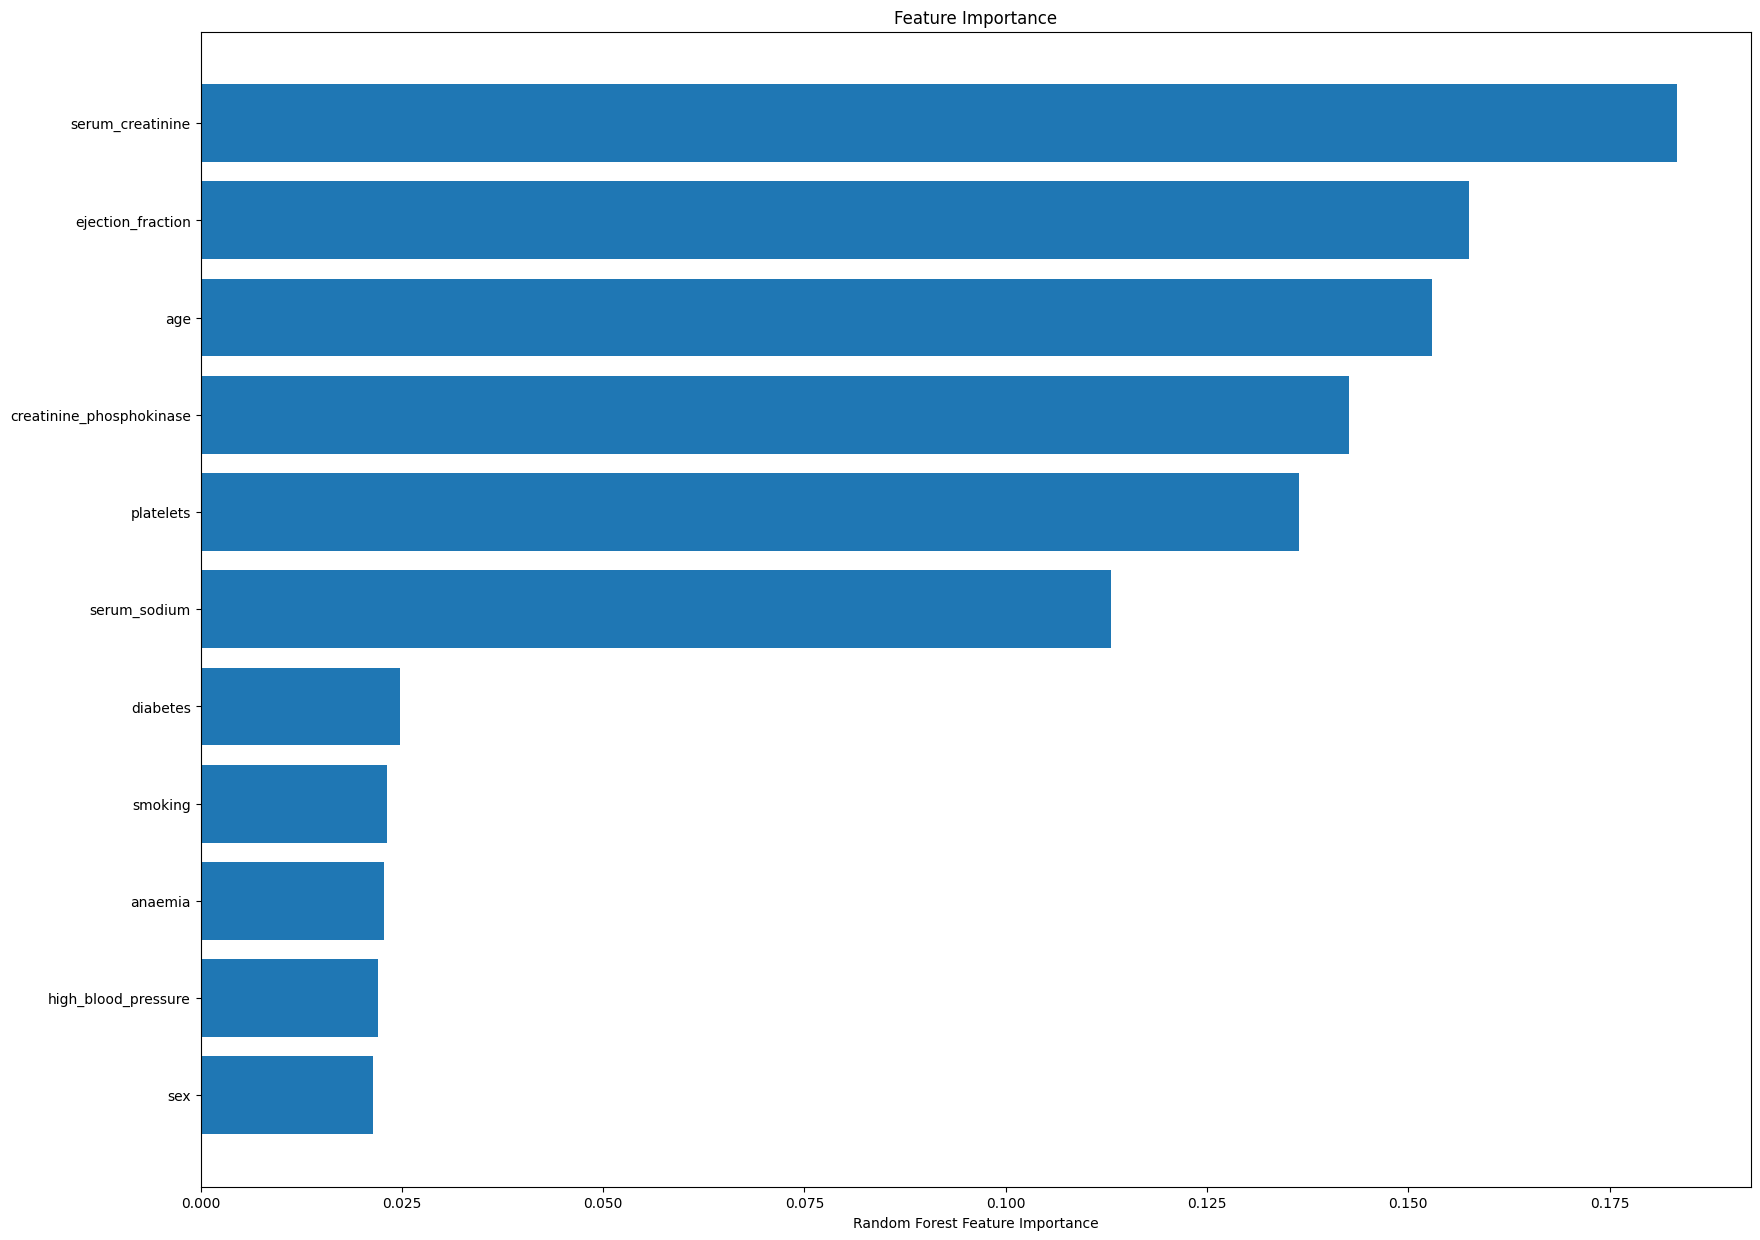

In [104]:
## Checking Feature importance

plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

In [122]:
# Using XGBoost
from xgboost import XGBClassifier
acc_XGB=[]
kf = StratifiedKFold(n_splits=2)
for fold , (trn_,val_) in enumerate(kf.split(X=dfTrain,y=y)):

    X_train=dfTrain.loc[trn_,feature_col_tree]
    y_train=dfTrain.loc[trn_,target]

    X_valid=dfTrain.loc[val_,feature_col_tree]
    y_valid=dfTrain.loc[val_,target]

    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       102
           1       0.50      0.35      0.41        48

    accuracy                           0.68       150
   macro avg       0.62      0.59      0.60       150
weighted avg       0.66      0.68      0.66       150

The accuracy for 1 : 0.59375
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       101
           1       0.49      0.62      0.55        48

    accuracy                           0.67       149
   macro avg       0.64      0.66      0.65       149
weighted avg       0.70      0.67      0.68       149

The accuracy for 2 : 0.6590346534653465


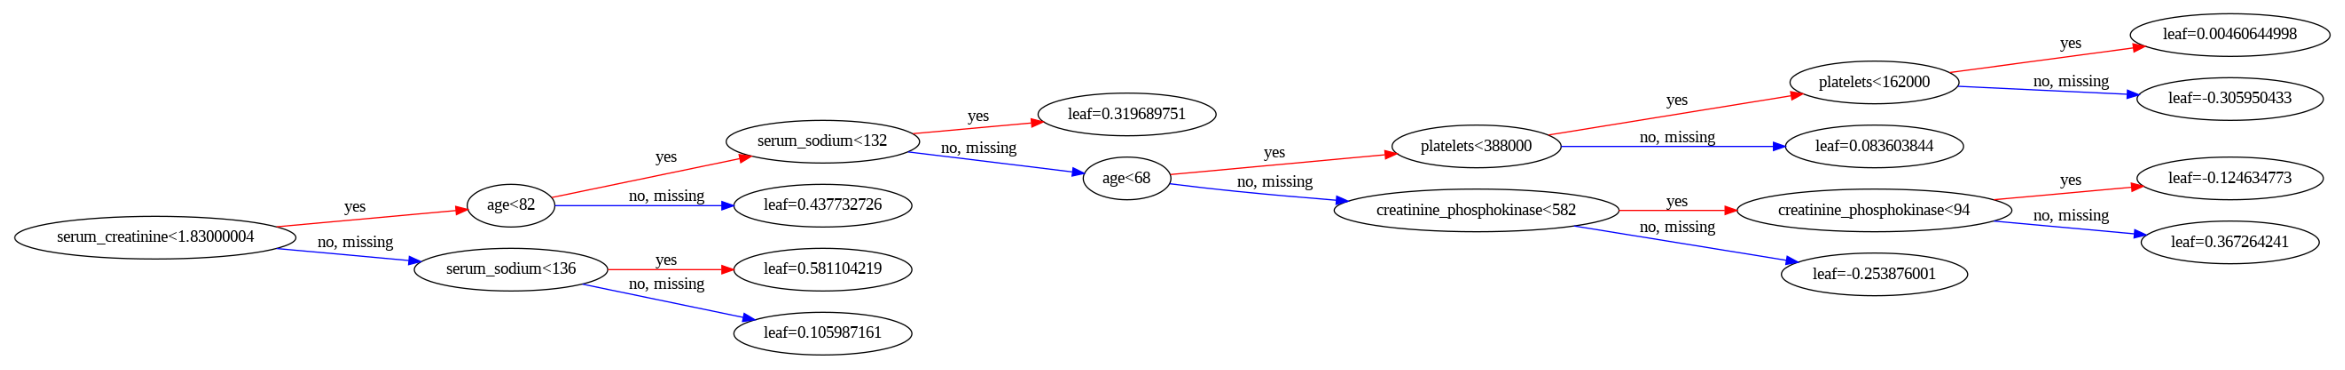

In [123]:
fig, ax = plt.subplots(figsize=(30, 30))
from xgboost import plot_tree
plot_tree(clf,num_trees=0,rankdir="LR",ax=ax)
plt.show()